In [1]:
import pandas as pd
import numpy as np

### файл с данными data_history собран из диалогов
по ссылке

В файле data_history я добавила цепочки диалогов в каждый объект данных постепенно.



In [2]:
df_lbl = pd.read_csv('data_history.csv')
df_lbl=df_lbl.drop(columns=['Unnamed: 0'])

FileNotFoundError: [Errno 2] No such file or directory: 'data_history.csv'

In [ ]:
len(df_lbl)

In [58]:
df_lbl.head(15)

,index,0,0.1,0.2,0.3,0.4,0.5
0,Patient: I feel like I'm stuck in a rut. I go...,It sounds like you're experiencing a sense of ...,NaN,NaN,NaN,NaN,NaN
1,Patient: I feel like I'm stuck in a rut. I go...,It sounds like you're experiencing a sense of ...,NaN,NaN,NaN,NaN,NaN
2,Patient: I feel like I'm stuck in a rut. I go...,It's important to acknowledge the reality of d...,NaN,NaN,NaN,NaN,NaN
3,Patient: I feel like I'm stuck in a rut. I go...,Let's explore what might be preventing you fro...,NaN,NaN,NaN,NaN,NaN
4,Patient: I feel like I'm stuck in a rut. I go...,"It's understandable to fear failure, but it's ...",NaN,NaN,NaN,NaN,NaN
5,Patient: I feel like I'm stuck in a rut. I go...,That's a great starting point. What's holding ...,NaN,NaN,NaN,NaN,NaN
6,Patient: I feel like I'm stuck in a rut. I go...,Let's break this down into smaller steps. Can ...,NaN,NaN,NaN,NaN,NaN
7,Patient: I feel like I'm stuck in a rut. I go...,"Great! And remember, our lives have meaning wh...",NaN,NaN,NaN,NaN,NaN
8,Patient: I've been feeling really anxious lat...,NaN,That sounds really distressing. Have you notic...,NaN,NaN,NaN,NaN
9,Patient: I've been feeling really anxious lat...,NaN,It sounds like you might be experiencing some ...,NaN,NaN,NaN,NaN


 упс, что-то странное, много Nan'ов надо разобраться и сделать аккуратный датафрейм

In [59]:
for column in df_lbl.columns:
    print(column, sum(df_lbl[column].isna()), len(df_lbl[column].dropna()))

index 0 1457023
0 1457015 8
0.1 1457016 7
0.2 1456597 426
0.3 710294 746729
0.4 1457006 17
0.5 747187 709836


значит проблема только в ответах терапевтов (Запускала несколько раз и походу от загрузки данных добавлялся новый индекс колонки ответа), надо все ответы в одну колоку перенести

In [60]:
# проверим а индексы nan.ов идут по порядку? если да, тогда действительно причина в том, что каждый  раз когда я запускала скрипт, и колонки смещались
for column in df_lbl.columns[1:]:
    s=df_lbl[column].notna()
    indices = (s[s].index.values)
    print(max(indices)-min(indices)+1, len(indices))

8 8
7 7
426 426
746729 746729
17 17
709836 709836


объединим все

In [67]:
for column in df_lbl.columns[2:]:
    s=df_lbl[column].notna()
    indices = (s[s].index.values)
    df_lbl['0'].iloc[indices[0]:indices[len(indices)-1]+1] = df_lbl[column].iloc[indices[0]:indices[len(indices)-1]+1]

In [69]:
#проверим все ли ок

df_end = df_lbl[['index','0']]
print(len(df_end['index'].isna()), len(df_end['0'].isna()))

1457023 1457023


теперь случайно выдернем несколько фраз, посмотрим вес ли там ок


In [103]:
random_ind = np.random.randint(len(df_end),size=4)

In [104]:
random_phrases = df_end.iloc[random_ind]

In [110]:
for row in random_phrases.iterrows():
    print('------------------------------------------')
    print('input: ', row[1]['index'],'\n')
    print('target: ', row[1]['0'])

------------------------------------------
input:   Patient: I'm feeling incredibly lost and unsure about my future. I've been thinking a lot about what I want to do with my life, but nothing seems to feel right. Therapist:  

target:  It sounds like you're experiencing a lot of anxiety and uncertainty about your future. Can you tell me more about what's been coming up for you?
------------------------------------------
input:   Patient: I'm not sure if I should continue with my studies. I feel lost and confused about my future. Therapist: It sounds like you're experiencing a lot of uncertainty and pressure regarding your academic direction. Let's explore this together. Can you tell me more about what's causing these feelings for you? Patient: I just feel like I'm not passionate about anything anymore. I used to love my major, but now everything feels pointless. Therapist: I see. It can be difficult to maintain our drive and enthusiasm for a subject over a long period of time. Have you

 вроде все хорошо! (я когда генерировала данные, старалась сразу сделать хорошо)

# Теперь посмотрим на распределение частот слов

In [122]:
# думаю надо лемматизировать, чтоб считать слова за одинаковые независимо от окончания и суффиксов

In [176]:
import spacy
import collections
import seaborn as sns

In [163]:
!python -m spacy download en_core_web_sm

^C


In [137]:
nlp = spacy.load("en_core_web_sm")

In [142]:
target_data = df_end['0'].tolist()

In [146]:
len(target_data)

1457023

In [150]:
a = [1,2,3,4,5]

[1084420,
 80404,
 138577,
 628346,
 297638,
 1356516,
 294537,
 134470,
 394418,
 456771,
 117586,
 1374693,
 243035,
 348462,
 651381,
 992914,
 1350429,
 46273,
 1402262,
 420559,
 1122666,
 184736,
 1287681,
 676349,
 535547,
 427962,
 348847,
 195685,
 366557,
 206004,
 797750,
 530193,
 702229,
 135385,
 958594,
 74120,
 1445168,
 1344785,
 303135,
 1439822,
 292775,
 369725,
 1257601,
 1006529,
 725813,
 622479,
 239703,
 639080,
 93220,
 140632,
 1196494,
 1313678,
 1096145,
 291383,
 982391,
 888640,
 743956,
 484445,
 786109,
 1108348,
 615847,
 1064828,
 968537,
 658468,
 879197,
 361000,
 1428060,
 142969,
 625529,
 942914,
 743967,
 1170505,
 1429476,
 430329,
 1080470,
 33195,
 666175,
 416762,
 1329590,
 417999,
 1316179,
 869736,
 21980,
 878086,
 868618,
 760826,
 1221194,
 86897,
 1282575,
 444732,
 933360,
 407123,
 336347,
 1061062,
 155497,
 1314223,
 947079,
 919143,
 131829,
 395360,
 553921,
 233573,
 860271,
 149758,
 1316988,
 698168,
 291248,
 851675,
 847743

# 1.5 млн объектов, а сдавать анализ надо уже сегодня, поэтому я рандомно семплирую 10.000 объектов и буду надеяться, что общее распределение слов будет таким же

In [169]:
all_target_tokens = []
random_ind = np.random.randint(len(target_data), size=10000)
for i,object in enumerate(list(map(lambda x: target_data[x],random_ind))):
    all_target_tokens+=([token.lemma_.lower() for token in nlp(object) if
            not token.is_stop
            and not token.is_punct
            and not token.is_space])
#all_target_tokens

In [168]:
input_data = df_end['index'].tolist()
all_input_tokens = []
random_ind = np.random.randint(len(target_data), size=10000)
for i,object in enumerate(list(map(lambda x: input_data[x],random_ind))):
    all_input_tokens+=([token.lemma_.lower() for token in nlp(object) if
            not token.is_stop
            and not token.is_punct
            and not token.is_space])
#all_target_tokens

<Axes: ylabel='Count'>

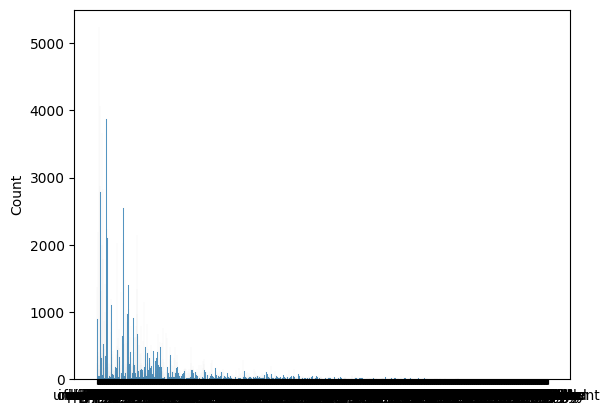

In [177]:
sns.histplot(all_target_tokens)

не видно слов, но видно что есть часть слов которые встречаются более 1000 раз, а остальные (и их больше) - намного чаще. Предположу что тут распределение ~степенное. Лучше посомтрю без графика а через Counter.

In [178]:
ttokens_dict = (collections.Counter(all_target_tokens))
itokens_dict = (collections.Counter(all_input_tokens))

In [182]:
ordered_ttokens = ttokens_dict.most_common()
ordered_itokens = itokens_dict.most_common()

In [183]:
ordered_ttokens

[('life', 5235),
 ('feel', 4063),
 ('explore', 3871),
 ('important', 3666),
 ('like', 2878),
 ('remember', 2831),
 ('value', 2778),
 ('purpose', 2542),
 ('way', 2230),
 ('let', 2194),
 ('meaning', 2149),
 ('find', 2105),
 ('sense', 2021),
 ('experience', 2020),
 ('sound', 2001),
 ('time', 1789),
 ('thing', 1477),
 ('feeling', 1421),
 ('bring', 1406),
 ('great', 1368),
 ('common', 1342),
 ('think', 1318),
 ('work', 1301),
 ('understandable', 1236),
 ('okay', 1196),
 ('step', 1148),
 ('take', 1104),
 ('fulfillment', 1042),
 ('consider', 1034),
 ('help', 1005),
 ('struggle', 979),
 ('choice', 975),
 ('existential', 966),
 ('belief', 906),
 ('start', 901),
 ('align', 885),
 ('try', 873),
 ('tell', 858),
 ('new', 852),
 ('fear', 824),
 ('interest', 819),
 ('want', 798),
 ('difficult', 798),
 ('joy', 795),
 ('small', 766),
 ('freedom', 750),
 ('self', 732),
 ('make', 729),
 ('passion', 700),
 ('activity', 686),
 ('meaninglessness', 669),
 ('challenge', 666),
 ('people', 650),
 ('action', 643

больше 1000 раз встречаются слова: *life, feel, explore, important, like, remember, value, purpose, way,let, meaning, find, sense, experience, sound,time, thing, feeling, bring, great, work, understandable, okay,step, take, fulfillment, consider, help*

делаю вывод что скорее всего бот ответит что-то про то, что любые чувства это нормально (okay) и предложит ориентироваться на свои ценности (values) и будет предлагать найти свою цель (purpose/life) в жизни. Кроме того, ориентироваться на свой личный опыт (experience) и сделать шаг (step) к наполнению своей жизнь (fullfilment).... непонятно чем, наверное для каждого запроса свой вариант чем заполнять своб жизнь!

In [184]:
itokens_dict.most_common()

[('feel', 42299),
 ('therapist', 38834),
 ('patient', 38768),
 ('like', 33648),
 ('life', 24772),
 ('know', 14140),
 ('explore', 10220),
 ('think', 10180),
 ('purpose', 9813),
 ('sound', 8837),
 ('sense', 8400),
 ('value', 8157),
 ('important', 8063),
 ('feeling', 7909),
 ('lose', 7755),
 ('experience', 7379),
 ('time', 7318),
 ('want', 7156),
 ('go', 7031),
 ('lately', 6876),
 ('find', 6633),
 ('meaning', 6627),
 ('way', 6381),
 ('let', 5935),
 ('thing', 5683),
 ('sure', 5587),
 ('make', 5212),
 ('common', 5116),
 ('start', 5024),
 ('try', 4926),
 ('struggle', 4886),
 ('work', 4879),
 ('tell', 4740),
 ('job', 4462),
 ('bring', 4307),
 ('understandable', 4109),
 ('remember', 3980),
 ('guess', 3610),
 ('consider', 3578),
 ('existential', 3555),
 ('lot', 3483),
 ('people', 3328),
 ('meaninglessness', 3178),
 ('motion', 3154),
 ('direction', 3015),
 ('matter', 3013),
 ('choice', 2972),
 ('help', 2940),
 ('good', 2907),
 ('joy', 2835),
 ('fulfillment', 2826),
 ('interest', 2786),
 ('diffic

тут намного больше слов, просто потомиу что в запросе у нас часть истории переписки сохраняется, а слова patient, therapist не учитываем, так как это специальные слова разделители.
Зато видно что чаще всего (вероятно вообще в каждом предложении) человек пишет что он чувствует (feel-42к) или (реже) думает (Think-10180)

посмотрим на другие слова встречащиеся чаще 5к раз
*start,common, make, sure, let, thing, way, meaning, find, lately, go, want, time, experience, lose, feeling, important, value, sense, sound, purpose, explore, know, life, like*


1) много совпадений с target => Бот склонен повторять то что в input'e(??). В целом это даже оправдано правилами эмпатичного общения психолог. Уточнения из серии "то есть вы хотите сказать что чувствуете ххх"?
2) думаю тут люди рассказывают о том, что чувствуют (feel) что теряют (lose) смысл жизни (purpose,life) в последнее время (lately)

окей. Тут стоит сказать что когда я генерировала данные, я задала чатгпт system content (там где задается каким именно асисстентом является), что это экзистенциальный психолог...  случился сильный биас в эту сторону. Эх. В перспективе - на каждое направление нагенерить свой датасет.